# MDP1 Gamblre`s problem

Value Iteration took 11 iterations and 0.0358 seconds to converge.
Policy Iteration took 8 iterations and 0.0781 seconds to converge.


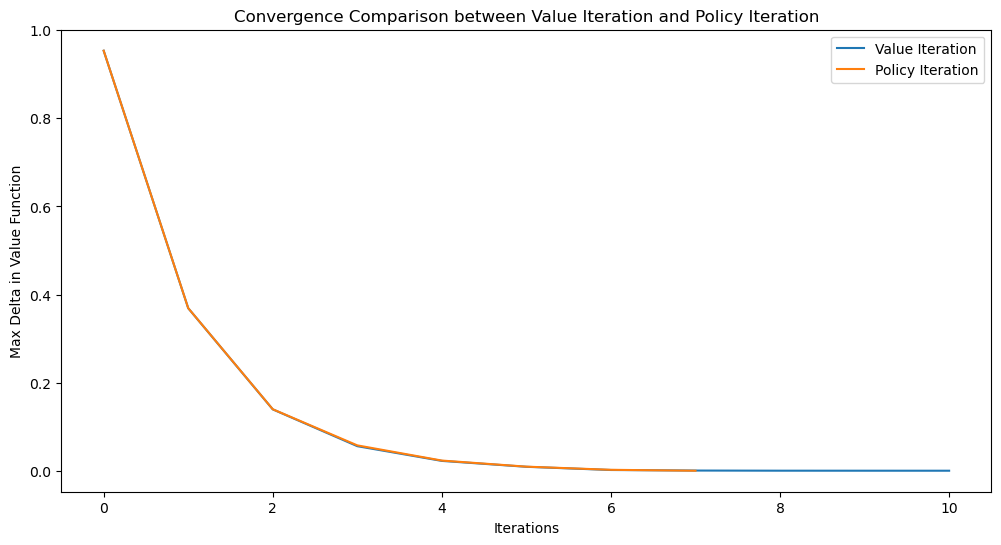

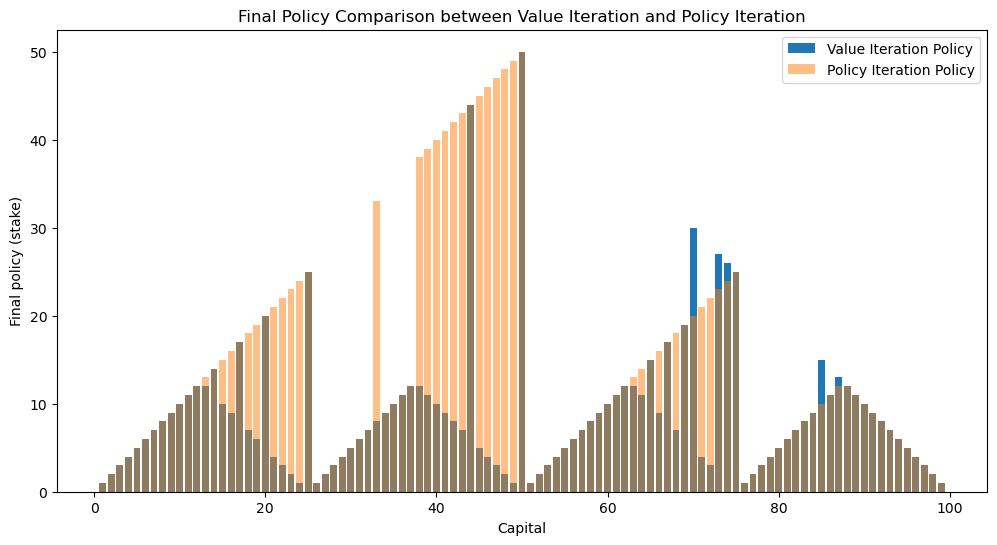

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time  # Import time module

# Define the policy evaluation function
def policy_evaluation(policy, rewards, gamma, threshold=1e-5):
    V = np.zeros(101)
    while True:
        delta = 0
        for s in range(1, 100):
            v = V[s]
            a = int(policy[s])
            next_state_win = min(s + a, 100)
            next_state_lose = max(s - a, 0)
            V[s] = p * (rewards[next_state_win] + gamma * V[next_state_win]) + \
                   (1 - p) * (rewards[next_state_lose] + gamma * V[next_state_lose])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    return V

# Define the policy improvement function
def policy_improvement(V, rewards, gamma):
    policy = np.zeros(100)
    for s in range(1, 100):
        actions = np.zeros(min(s, 100 - s) + 1)
        for a in range(1, min(s, 100 - s) + 1):
            actions[a] = p * (rewards[s + a] + gamma * V[s + a]) + (1 - p) * (rewards[s - a] + gamma * V[s - a])
        policy[s] = np.argmax(actions)
    return policy

# Define the value iteration function
def value_iteration_for_gamblers(p, gamma=1, threshold=1e-5):
    rewards = np.zeros(101)
    rewards[100] = 1
    
    V = np.zeros(101)
    policy = np.zeros(100)
    deltas = []
    iteration_count = 0

    while True:
        delta = 0
        iteration_count += 1
        for s in range(1, 100):
            v = V[s]
            actions = np.zeros(min(s, 100 - s) + 1)
            for a in range(1, min(s, 100 - s) + 1):
                actions[a] = p * (rewards[s + a] + gamma * V[s + a]) + (1 - p) * (rewards[s - a] + gamma * V[s - a])
            V[s] = np.max(actions)
            policy[s] = np.argmax(actions)
            delta = max(delta, abs(v - V[s]))
        deltas.append(delta)
        if delta < threshold:
            break

    return policy, V, deltas, iteration_count

# Define the policy iteration function
def policy_iteration_for_gamblers(p, gamma=1, threshold=1e-5):
    rewards = np.zeros(101)
    rewards[100] = 1

    policy = np.zeros(100)
    is_stable = False
    deltas = []
    iteration_count = 0

    while not is_stable:
        V = policy_evaluation(policy, rewards, gamma, threshold)
        iteration_count += 1
        is_stable = True
        for s in range(1, 100):
            old_action = policy[s]
            actions = np.zeros(min(s, 100 - s) + 1)
            for a in range(1, min(s, 100 - s) + 1):
                actions[a] = p * (rewards[s + a] + gamma * V[s + a]) + (1 - p) * (rewards[s - a] + gamma * V[s - a])
            best_action = np.argmax(actions)
            policy[s] = best_action
            if old_action != best_action:
                is_stable = False

        deltas.append(max(abs(V - policy_evaluation(policy, rewards, gamma, threshold))))

    return policy, V, deltas, iteration_count

# Define the probability of winning
p = 0.4

# Calculate computation time for Value Iteration
start_time = time.time()
vi_policy, vi_value_function, vi_deltas, vi_iteration_count = value_iteration_for_gamblers(p)
vi_time = time.time() - start_time

# Calculate computation time for Policy Iteration
start_time = time.time()
pi_policy, pi_value_function, pi_deltas, pi_iteration_count = policy_iteration_for_gamblers(p)
pi_time = time.time() - start_time

# Print the iteration counts and computation times
print(f"Value Iteration took {vi_iteration_count} iterations and {vi_time:.4f} seconds to converge.")
print(f"Policy Iteration took {pi_iteration_count} iterations and {pi_time:.4f} seconds to converge.")


# Plotting the deltas to show convergence over iterations
plt.figure(figsize=(12, 6))
plt.plot(vi_deltas, label='Value Iteration')
plt.plot(pi_deltas, label='Policy Iteration')
plt.xlabel('Iterations')
plt.ylabel('Max Delta in Value Function')
plt.title('Convergence Comparison between Value Iteration and Policy Iteration')
plt.legend()
plt.show()

# Plotting the final policies obtained from both methods
plt.figure(figsize=(12, 6))
plt.bar(range(1, 100), vi_policy[1:], label='Value Iteration Policy')
plt.bar(range(1, 100), pi_policy[1:], alpha=0.5, label='Policy Iteration Policy')
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Final Policy Comparison between Value Iteration and Policy Iteration')
plt.legend()
plt.show()


In [2]:
print("Value Iteration Deltas:", vi_deltas)
print("Policy Iteration Deltas:", pi_deltas)


Value Iteration Deltas: [0.9533440000000001, 0.3688960000000001, 0.13926400000000005, 0.05570560000000002, 0.02228224000000001, 0.008912896000000003, 0.0016384000000000008, 0.0003932160000000005, 7.602595430399994e-05, 3.041038172160032e-05, 2.6418075402233343e-06]
Policy Iteration Deltas: [0.9533440000000001, 0.369054836250859, 0.13953037398481663, 0.057535428550020334, 0.02306359090737541, 0.009225097009269049, 0.002064420315961754, 0.0]


# MDP2 Grid world problem

Value Iteration converged in 126 iterations and 33.9548 seconds to converge.
Policy Iteration converged in 22 iterations and 30.8268 seconds to converge.


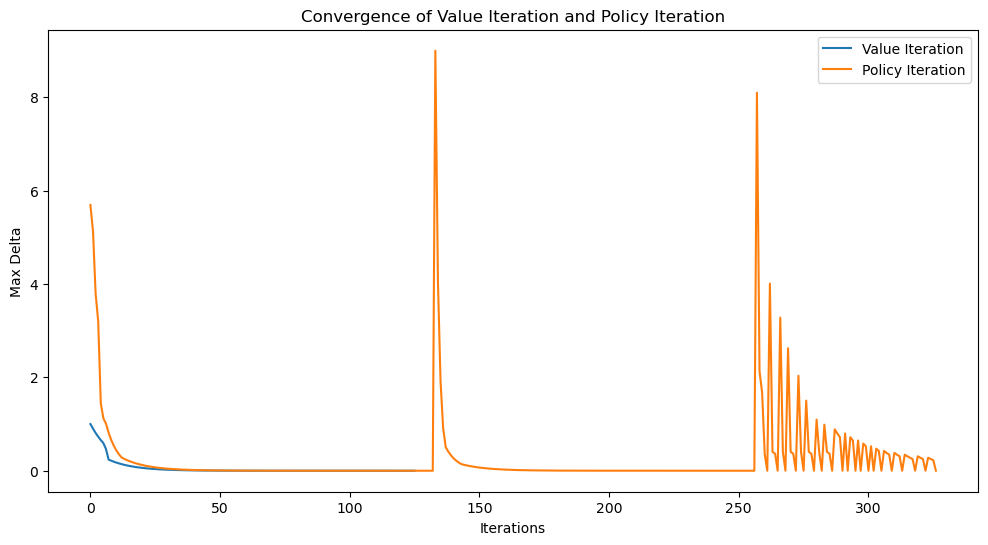

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
GRID_SIZE = 20
NUM_STATES = GRID_SIZE * GRID_SIZE
NUM_ACTIONS = 4  # Up, Down, Left, Right
transition_probs = np.zeros((NUM_STATES, NUM_ACTIONS, NUM_STATES))
rewards = np.zeros((NUM_STATES, NUM_ACTIONS, NUM_STATES))

# Introduce obstacles and stochastic transitions
obstacle_states = {50, 70, 90}  # Example obstacle states
stochastic_states = {30, 130}  # Example stochastic states

for state in range(NUM_STATES):
    if state in obstacle_states:
        continue  # No transitions from obstacle states

    row, col = divmod(state, GRID_SIZE)
    for action in range(NUM_ACTIONS):
        new_row, new_col = row, col

        if action == 0 and row > 0:  # Up
            new_row -= 1
        elif action == 1 and row < GRID_SIZE - 1:  # Down
            new_row += 1
        elif action == 2 and col > 0:  # Left
            new_col -= 1
        elif action == 3 and col < GRID_SIZE - 1:  # Right
            new_col += 1

        new_state = new_row * GRID_SIZE + new_col
        if new_state in obstacle_states:
            new_state = state  # If obstacle, stay in the same state

        # Stochastic transitions
        if state in stochastic_states and random.random() < 0.3:
            # 30% chance to stay in the same state
            transition_probs[state, action, state] += 0.3
            transition_probs[state, action, new_state] += 0.7
        else:
            transition_probs[state, action, new_state] = 1

        # Varied rewards
        rewards[state, action, new_state] = -1  # Default reward
        if state % 5 == 0:  # Every 5th state has a higher reward
            rewards[state, action, new_state] = -0.5

# Set a goal state with different reward
goal_state = GRID_SIZE * GRID_SIZE - 1  # Bottom-right corner as the goal
for action in range(NUM_ACTIONS):
    rewards[goal_state, action, :] = 0  # Reward of 0 for reaching the goal


def value_iteration_with_tracking(transition_probs, rewards, gamma=0.9, theta=1e-6):
    V = np.zeros(NUM_STATES)
    deltas = []  # Track changes in value function
    iteration_counter = 0
    while True:
        delta = 0
        for state in range(NUM_STATES):
            v = V[state]
            V[state] = max(sum(transition_probs[state, action, next_state] * 
                               (rewards[state, action, next_state] + gamma * V[next_state])
                               for next_state in range(NUM_STATES)) for action in range(NUM_ACTIONS))
            delta = max(delta, abs(v - V[state]))
        deltas.append(delta)
        iteration_counter += 1
        if delta < theta:
            break
    return V, deltas, iteration_counter

def policy_iteration_with_tracking(transition_probs, rewards, gamma=0.9, theta=1e-6):
    policy = np.random.choice(NUM_ACTIONS, NUM_STATES)
    V = np.zeros(NUM_STATES)
    policy_deltas = []  
    iteration_counter = 0
    while True:
        while True:
            old_V = np.copy(V)
            for state in range(NUM_STATES):
                action = policy[state]
                V[state] = sum(transition_probs[state, action, next_state] * 
                               (rewards[state, action, next_state] + gamma * V[next_state])
                               for next_state in range(NUM_STATES))
            delta = np.max(np.abs(old_V - V))
            policy_deltas.append(delta)
            if delta < theta:
                break

        policy_stable = True
        for state in range(NUM_STATES):
            old_action = policy[state]
            new_action = np.argmax([sum(transition_probs[state, action, next_state] * 
                                        (rewards[state, action, next_state] + gamma * V[next_state])
                                        for next_state in range(NUM_STATES)) for action in range(NUM_ACTIONS)])
            policy[state] = new_action
            if old_action != new_action:
                policy_stable = False

        iteration_counter += 1
        if policy_stable:
            break
    return policy, policy_deltas, iteration_counter

def extract_policy_from_value_function(V, transition_probs, rewards, gamma=0.9):
    policy = np.zeros(NUM_STATES, dtype=int)
    for state in range(NUM_STATES):
        action_values = np.zeros(NUM_ACTIONS)
        for action in range(NUM_ACTIONS):
            action_values[action] = sum(transition_probs[state, action, next_state] * 
                                        (rewards[state, action, next_state] + gamma * V[next_state])
                                        for next_state in range(NUM_STATES))
        policy[state] = np.argmax(action_values)
    return policy

def plot_policy(policy, title="Policy"):
    # Map actions to arrows
    action_symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    grid_policy = np.array([action_symbols[action] for action in policy]).reshape(GRID_SIZE, GRID_SIZE)

    # Create a figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(title)
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.grid(which='both')

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            ax.text(j + 0.5, GRID_SIZE - i - 0.5, grid_policy[i, j], ha='center', va='center')

    plt.show()

# Run the algorithms
start_time = time.time()
vi_value_table, vi_deltas, vi_iterations = value_iteration_with_tracking(transition_probs, rewards)
vi_time = time.time() - start_time

start_time = time.time()
pi_policy, pi_deltas, pi_iterations = policy_iteration_with_tracking(transition_probs, rewards)
pi_time = time.time() - start_time

# Extract policy from Value Iteration
vi_policy = extract_policy_from_value_function(vi_value_table, transition_probs, rewards)

# Print Iteration Counts
print(f"Value Iteration converged in {vi_iterations} iterations and {vi_time:.4f} seconds to converge.")
print(f"Policy Iteration converged in {pi_iterations} iterations and {pi_time:.4f} seconds to converge.")

# Plotting Convergence
plt.figure(figsize=(12, 6))
plt.plot(vi_deltas, label='Value Iteration')
plt.plot(pi_deltas, label='Policy Iteration')
plt.xlabel('Iterations')
plt.ylabel('Max Delta')
plt.title('Convergence of Value Iteration and Policy Iteration')
plt.legend()
plt.show()



Value Iteration converged in 126 iterations.
Policy Iteration converged in 23 iterations.


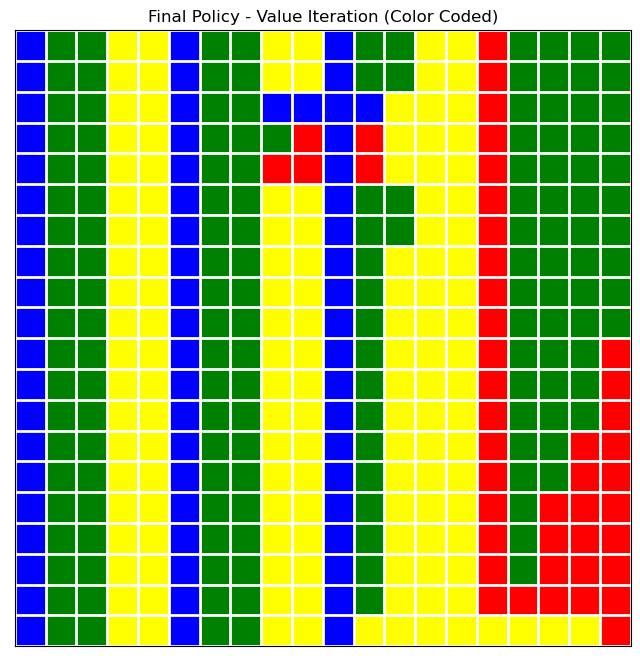

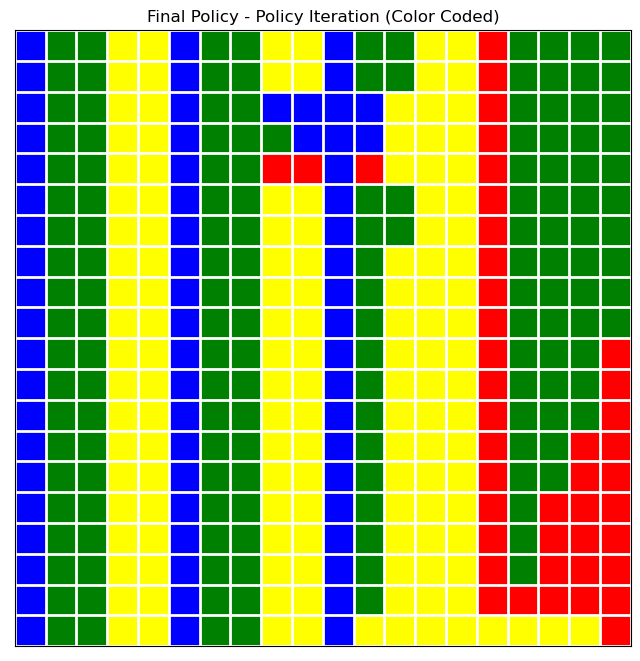

In [5]:
# A nicer plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_policy_color_coded(policy, title="Policy"):
    # Map actions to integers
    action_to_int = {
        0: 0,  # Up
        1: 1,  # Down
        2: 2,  # Left
        3: 3   # Right
    }
    # Convert policy actions to integers
    grid_policy_int = np.array([action_to_int[action] for action in policy]).reshape(GRID_SIZE, GRID_SIZE)

    # Create a color map for these integers
    cmap = mcolors.ListedColormap(['blue', 'red', 'green', 'yellow'])

    # Create a figure
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(title)
    cax = ax.matshow(grid_policy_int, cmap=cmap)  # Use the integer mapping

    # Adding grid lines
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()


# Run the algorithms
vi_value_table, vi_deltas, vi_iterations = value_iteration_with_tracking(transition_probs, rewards)
pi_policy, pi_deltas, pi_iterations = policy_iteration_with_tracking(transition_probs, rewards)

# Extract policy from Value Iteration
vi_policy = extract_policy_from_value_function(vi_value_table, transition_probs, rewards)

# Print Iteration Counts
print(f"Value Iteration converged in {vi_iterations} iterations.")
print(f"Policy Iteration converged in {pi_iterations} iterations.")

# Plot the policies with color coding
plot_policy_color_coded(vi_policy, "Final Policy - Value Iteration (Color Coded)")
plot_policy_color_coded(pi_policy, "Final Policy - Policy Iteration (Color Coded)")


# Q-learning Gamblers 

 Qlearn converged in 44.29599475860596 seconds.


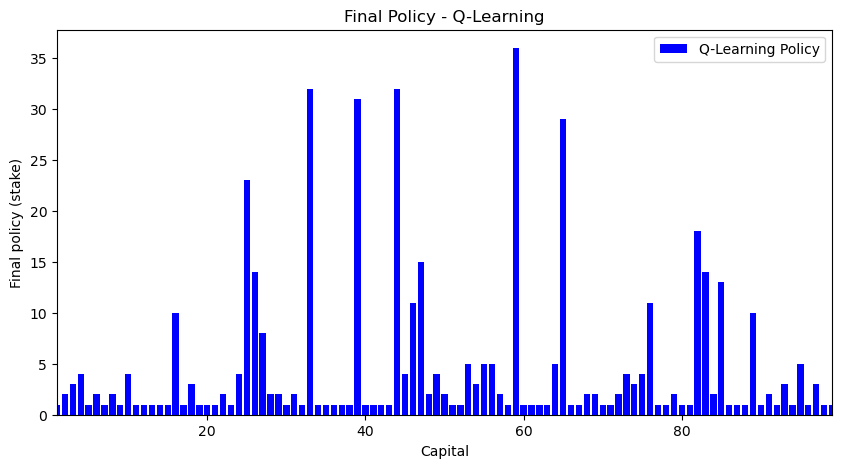

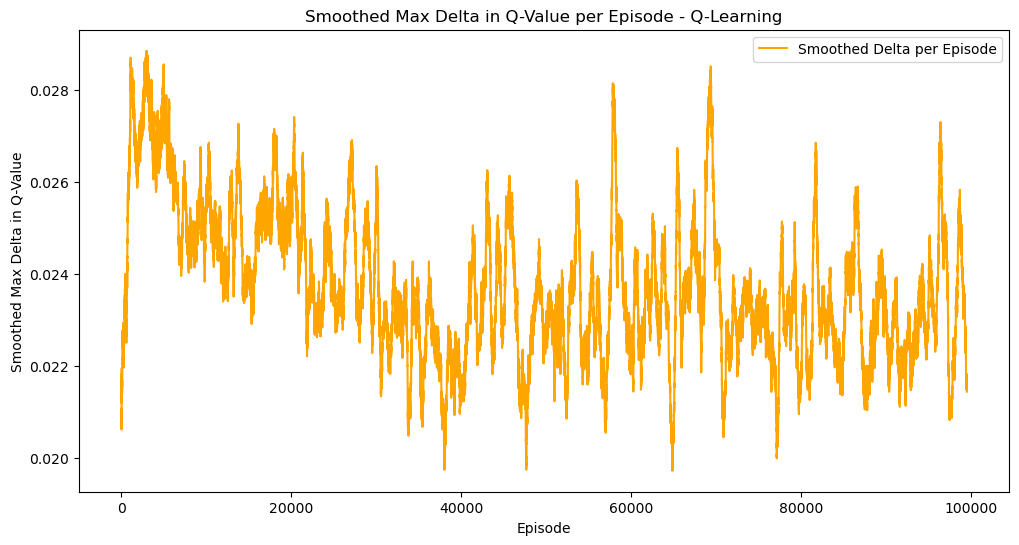

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the gambler's problem
GOAL = 100
STATES = np.arange(GOAL + 1)
GAMMA = 1  # Discount factor
ALPHA = 0.1  # Learning rate
EPSILON = 0.1  # Exploration rate
EPISODES = 100000  # Number of episodes to run
WIN_PROB = 0.4  # Probability of the coin coming up heads

start_time = time.time()

# Initialize Q-values arbitrarily for all state-action pairs
Q = np.zeros((GOAL + 1, GOAL // 2 + 1))
deltas = []  # Track max change in Q-values (delta) for each iteration

# Function to choose an action using an epsilon-greedy policy
def epsilon_greedy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        # Explore: choose a random action
        return np.random.randint(1, min(state, GOAL - state) + 1)
    else:
        # Exploit: choose the best known action
        actions = Q[state, :min(state, GOAL - state) + 1]
        return np.random.choice(np.flatnonzero(actions == actions.max()))

# Q-learning algorithm
for episode in range(EPISODES):
    state = np.random.randint(1, GOAL)  # Start from a random state
    max_delta = 0  # Initialize max change in Q-values for this episode
    while state != 0 and state != GOAL:
        action = epsilon_greedy(state, Q, EPSILON)
        old_value = Q[state, action]
        reward = 0
        # Simulate the outcome
        if np.random.rand() < WIN_PROB:
            next_state = min(state + action, GOAL)
            if next_state == GOAL:
                reward = 1
        else:
            next_state = max(state - action, 0)

        # Q-learning update rule
        Q[state, action] += ALPHA * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])
        max_delta = max(max_delta, abs(Q[state, action] - old_value))
        state = next_state  # Move to the next state
    
    deltas.append(max_delta) 

ql_time = time.time() - start_time    
print(f" Qlearn converged in {ql_time} seconds.")
    
# Derive policy from Q-values
policy = np.argmax(Q, axis=1)

# Plotting the final policy
plt.figure(figsize=(10, 5))
plt.bar(range(1, GOAL), policy[1:GOAL], label='Q-Learning Policy', color='blue')
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Final Policy - Q-Learning')
plt.xlim([1, GOAL-1])
plt.legend()
plt.show()

def moving_average(x, window_size):
    return np.convolve(x, np.ones(window_size) / window_size, 'valid')

# Apply a moving average to the deltas with a chosen window size
smoothed_deltas = moving_average(deltas, window_size=500)

# Plotting iteration vs smoothed delta
plt.figure(figsize=(12, 6))
plt.plot(smoothed_deltas, label='Smoothed Delta per Episode', color='orange')
plt.xlabel('Episode')
plt.ylabel('Smoothed Max Delta in Q-Value')
plt.title('Smoothed Max Delta in Q-Value per Episode - Q-Learning')
plt.legend()
plt.show()


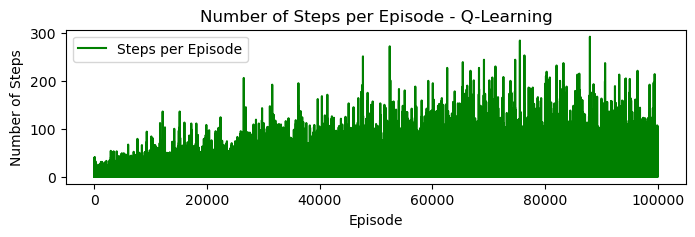

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the gambler's problem
GOAL = 100
STATES = np.arange(GOAL + 1)
GAMMA = 1  # Discount factor
ALPHA = 0.1  # Learning rate
EPSILON = 0.1  # Exploration rate
EPISODES = 100000  # Number of episodes to run
WIN_PROB = 0.4  # Probability of the coin coming up heads

# Initialize Q-values arbitrarily for all state-action pairs
Q = np.zeros((GOAL + 1, GOAL // 2 + 1))
deltas = []  # Track max change in Q-values (delta) for each iteration
steps_per_episode = []  # Track the number of steps per episode

# Function to choose an action using an epsilon-greedy policy
def epsilon_greedy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        # Explore: choose a random action
        return np.random.randint(1, min(state, GOAL - state) + 1)
    else:
        # Exploit: choose the best known action
        actions = Q[state, :min(state, GOAL - state) + 1]
        return np.random.choice(np.flatnonzero(actions == actions.max()))

# Q-learning algorithm
for episode in range(EPISODES):
    state = np.random.randint(1, GOAL)  # Start from a random state
    max_delta = 0  # Initialize max change in Q-values for this episode
    steps = 0  # Initialize step counter for this episode
    while state != 0 and state != GOAL:
        action = epsilon_greedy(state, Q, EPSILON)
        old_value = Q[state, action]
        reward = 0
        # Simulate the outcome
        if np.random.rand() < WIN_PROB:
            next_state = min(state + action, GOAL)
            if next_state == GOAL:
                reward = 1
        else:
            next_state = max(state - action, 0)

        # Q-learning update rule
        Q[state, action] += ALPHA * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])
        max_delta = max(max_delta, abs(Q[state, action] - old_value))
        state = next_state  # Move to the next state
        steps += 1  # Increment step counter
    
    deltas.append(max_delta)  # Append the max delta for this episode
    steps_per_episode.append(steps)  # Append the number of steps for this episode

# Plotting steps per episode
plt.figure(figsize=(8, 2))
plt.plot(steps_per_episode, label='Steps per Episode', color='green')
plt.xlabel('Episode')
plt.ylabel('Number of Steps')
plt.title('Number of Steps per Episode - Q-Learning')
plt.legend()
plt.show()


# QLearning Grid World

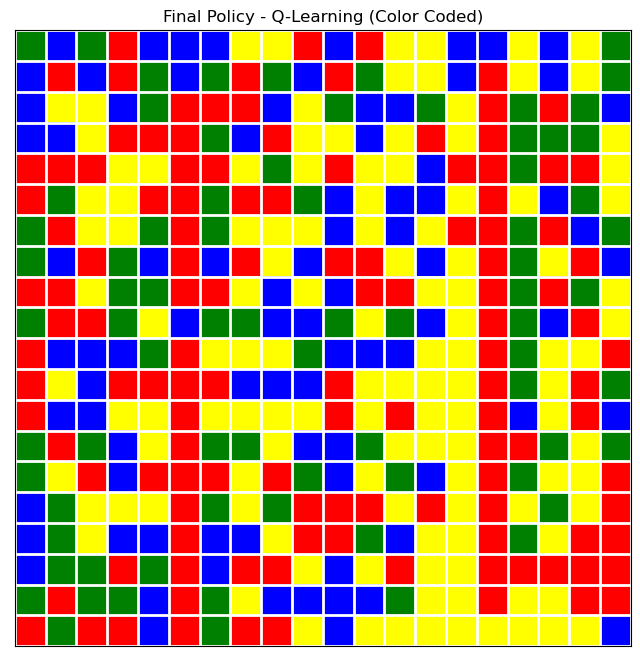

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
GRID_SIZE = 20
NUM_STATES = GRID_SIZE * GRID_SIZE
NUM_ACTIONS = 4  # Up, Down, Left, Right
ALPHA = 0.1  # Initial learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Initial exploration rate
NUM_EPISODES = 5000  # Reduced number of episodes
MAX_STEPS_PER_EPISODE = 100  # Maximum steps per episode to prevent very long episodes
goal_state = GRID_SIZE * GRID_SIZE - 1
obstacle_states = {50, 70, 90}
stochastic_states = {30, 130}

# Initialize Q-table
Q = np.zeros((NUM_STATES, NUM_ACTIONS))

# Epsilon decay
epsilon_decay = EPSILON / NUM_EPISODES

# Alpha decay
alpha_decay = ALPHA / NUM_EPISODES

# Function to choose an action based on epsilon-greedy strategy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, NUM_ACTIONS - 1)
    else:
        return np.argmax(Q[state])

def get_next_state(state, action):
    if state in obstacle_states:
        return state  # No transition from obstacle states

    row, col = divmod(state, GRID_SIZE)
    new_row, new_col = row, col

    if action == 0 and row > 0:  # Up
        new_row -= 1
    elif action == 1 and row < GRID_SIZE - 1:  # Down
        new_row += 1
    elif action == 2 and col > 0:  # Left
        new_col -= 1
    elif action == 3 and col < GRID_SIZE - 1:  # Right
        new_col += 1

    new_state = new_row * GRID_SIZE + new_col
    if new_state in obstacle_states:
        return state  # Stay in the same state if obstacle

    if state in stochastic_states and random.random() < 0.3:
        return state  

    return new_state

# Function to compute the reward given a state and next state
def get_reward(state, next_state):
    if next_state == goal_state:
        return 0  # Reward for reaching the goal
    return -0.5 if state % 5 == 0 else -1  # Higher reward for every 5th state

# Q-learning algorithm
for episode in range(NUM_EPISODES):
    state = random.randint(0, NUM_STATES - 1)
    epsilon = max(0.01, EPSILON - epsilon_decay * episode)  # Decaying epsilon
    alpha = max(0.01, ALPHA - alpha_decay * episode)  # Decaying alpha

    for _ in range(MAX_STEPS_PER_EPISODE):
        if state == goal_state:
            break

        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        reward = get_reward(state, next_state)

        # Update Q-value
        Q[state, action] = Q[state, action] + alpha * (reward + GAMMA * np.max(Q[next_state]) - Q[state, action])
        state = next_state

# Extract policy from Q-values
policy = np.argmax(Q, axis=1)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_policy_color_coded(policy, title="Policy"):
    # Map actions to integers
    action_to_int = {
        0: 0,  # Up
        1: 1,  # Down
        2: 2,  # Left
        3: 3   # Right
    }
    # Convert policy actions to integers
    grid_policy_int = np.array([action_to_int[action] for action in policy]).reshape(GRID_SIZE, GRID_SIZE)

    # Create a color map for these integers
    cmap = mcolors.ListedColormap(['blue', 'red', 'green', 'yellow'])

    # Create a figure
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title(title)
    cax = ax.matshow(grid_policy_int, cmap=cmap)  # Use the integer mapping

    # Adding grid lines
    ax.set_xticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, GRID_SIZE, 1), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

# Plot the policy with the new function
plot_policy_color_coded(policy, "Final Policy - Q-Learning (Color Coded)")


In [11]:
# # Collecting data for plots
# steps_per_episode = []
# avg_q_value_per_episode = []

# for episode in range(NUM_EPISODES):
#     state = random.randint(0, NUM_STATES - 1)
#     epsilon = max(0.01, EPSILON - epsilon_decay * episode)
#     alpha = max(0.01, ALPHA - alpha_decay * episode)

#     steps = 0
#     total_q_value = 0
#     num_q_values = 0

#     while state != goal_state and steps < MAX_STEPS_PER_EPISODE:
#         action = choose_action(state, epsilon)
#         next_state = get_next_state(state, action)
#         reward = get_reward(state, next_state)

#         # Update Q-value
#         Q[state, action] = Q[state, action] + alpha * (reward + GAMMA * np.max(Q[next_state]) - Q[state, action])
        
#         total_q_value += Q[state, action]
#         num_q_values += 1

#         state = next_state
#         steps += 1

#     steps_per_episode.append(steps)
#     if num_q_values > 0:
#         avg_q_value_per_episode.append(total_q_value / num_q_values)
#     else:
#         avg_q_value_per_episode.append(0)  # Append zero if no Q-value updates



# # Plotting Number of Steps per Episode
# plt.figure(figsize=(10, 6))
# plt.plot(steps_per_episode)
# plt.title("Number of Steps per Episode")
# plt.xlabel("Episode")
# plt.ylabel("Number of Steps")
# plt.show()

# # Plotting Average Q-Value per Episode
# plt.figure(figsize=(10, 6))
# plt.plot(avg_q_value_per_episode)
# plt.title("Average Q-Value per Episode")
# plt.xlabel("Episode")
# plt.ylabel("Average Q-Value")
# plt.show()


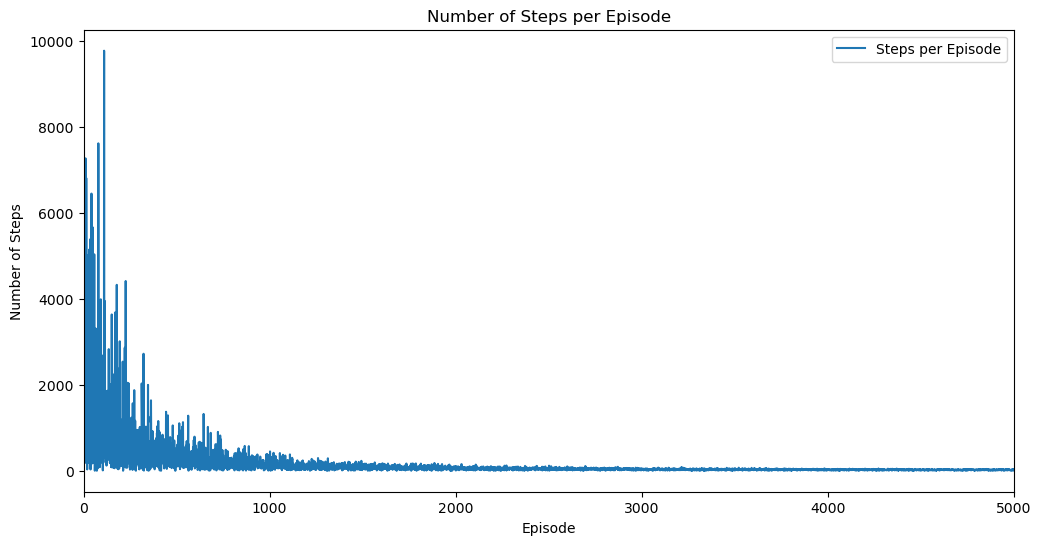

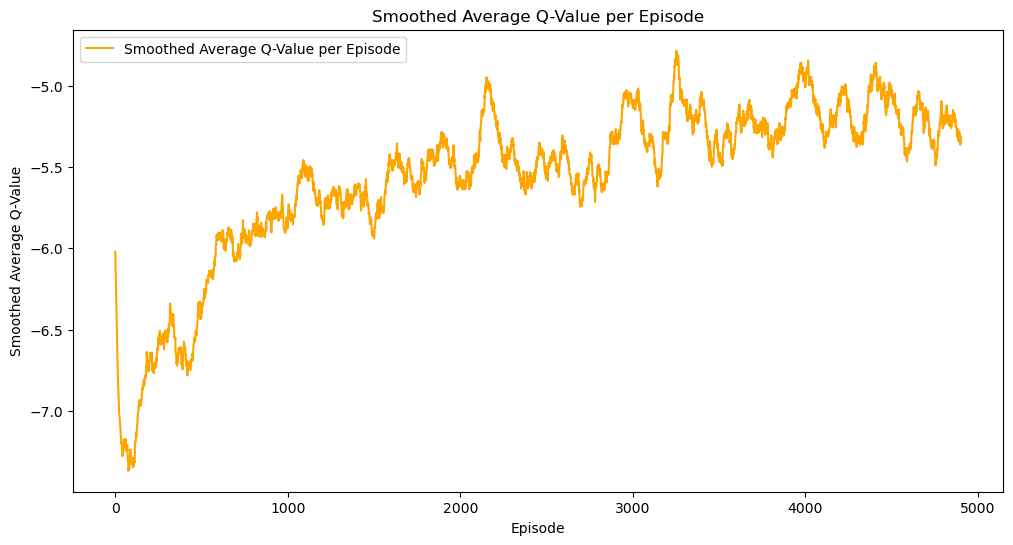

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Constants
GRID_SIZE = 20
NUM_STATES = GRID_SIZE * GRID_SIZE
NUM_ACTIONS = 4  # Up, Down, Left, Right
NUM_EPISODES = 5000
MAX_STEPS_PER_EPISODE = 10000
EPSILON = 1.0  # Starting value of epsilon for the epsilon-greedy strategy
epsilon_decay = EPSILON / NUM_EPISODES
ALPHA = 0.5  # Starting learning rate
alpha_decay = ALPHA / NUM_EPISODES
GAMMA = 0.9  # Discount factor
goal_state = GRID_SIZE * GRID_SIZE - 1

# Initialize Q-values
Q = np.zeros((NUM_STATES, NUM_ACTIONS))

# Function to choose an action based on epsilon-greedy policy
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, NUM_ACTIONS - 1)
    else:
        return np.argmax(Q[state])

# Function to get the next state based on action
def get_next_state(state, action):
    row, col = divmod(state, GRID_SIZE)
    if action == 0 and row > 0:  # Up
        return state - GRID_SIZE
    elif action == 1 and row < GRID_SIZE - 1:  # Down
        return state + GRID_SIZE
    elif action == 2 and col > 0:  # Left
        return state - 1
    elif action == 3 and col < GRID_SIZE - 1:  # Right
        return state + 1
    return state  # Return the same state if the action is not possible

# Function to get a reward given a state
def get_reward(state, next_state):
    if next_state == goal_state:
        return 0
    return -1

# Collecting data for plots
steps_per_episode = []
avg_q_value_per_episode = []

for episode in range(NUM_EPISODES):
    state = random.randint(0, NUM_STATES - 1)
    epsilon = max(0.01, EPSILON - epsilon_decay * episode)
    alpha = max(0.01, ALPHA - alpha_decay * episode)

    steps = 0
    total_q_value = 0
    num_q_values = 0

    while state != goal_state and steps < MAX_STEPS_PER_EPISODE:
        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        reward = get_reward(state, next_state)

        # Update Q-value
        Q[state, action] += alpha * (reward + GAMMA * np.max(Q[next_state]) - Q[state, action])

        total_q_value += Q[state, action]
        num_q_values += 1

        state = next_state
        steps += 1

    steps_per_episode.append(steps)
    avg_q_value_per_episode.append(total_q_value / num_q_values if num_q_values > 0 else 0)

# Plotting Number of Steps per Episode
plt.figure(figsize=(12, 6)) 
plt.plot(steps_per_episode, label='Steps per Episode')
plt.title("Number of Steps per Episode")
plt.xlabel("Episode")
plt.ylabel("Number of Steps")
plt.xlim(0, NUM_EPISODES)  # Set the x-axis limits to show all episodes
plt.legend()
plt.show()


def moving_average(data, window_size):
    cumulative_sum = np.cumsum(data, dtype=float)
    cumulative_sum[window_size:] = cumulative_sum[window_size:] - cumulative_sum[:-window_size]
    return cumulative_sum[window_size - 1:] / window_size

# Apply moving average to smooth the data
smoothed_avg_q_values = moving_average(avg_q_value_per_episode, window_size=100)

# Plotting Average Q-Value per Episode with smoothing
plt.figure(figsize=(12, 6))
plt.plot(smoothed_avg_q_values, label='Smoothed Average Q-Value per Episode', color='orange')
plt.title("Smoothed Average Q-Value per Episode")
plt.xlabel("Episode")
plt.ylabel("Smoothed Average Q-Value")
plt.legend()
plt.show()

